In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rc
from itertools import cycle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
Harr_pbc, Narr_pbc, qy_flow_arr_pbc = np.load('cgdata_periodic_17feb.npy')
Harr_obc, Narr_obc, qy_flow_arr_obc = np.load('cgdata_17feb.npy')

# Take average over trajectory. Discard first Ntrans entries (transient)
Nsweeps = 100000
Tvec = np.linspace(0.10,0.30,11)
Lvec = np.array([8])
Jvec = 0.1*np.logspace(0, 4, 20, base =np.e)

Ntrans=1000
i = 0
Earr_pbc = qy_flow_arr_pbc[:,i,:,Ntrans:]/(np.linspace(1+Ntrans,Nsweeps,Nsweeps-Ntrans)* Lvec[i]**2)
Earr_pbc_mean = np.mean(Earr_pbc,axis=2)

Ntrans=1000
i = 0
Earr_obc = qy_flow_arr_obc[:,i,:,Ntrans:]/(np.linspace(1+Ntrans,Nsweeps,Nsweeps-Ntrans) * Lvec[i]**2/2)
Earr_obc_mean = np.mean(Earr_obc,axis=2)

### Figure 22

<IPython.core.display.Javascript object>


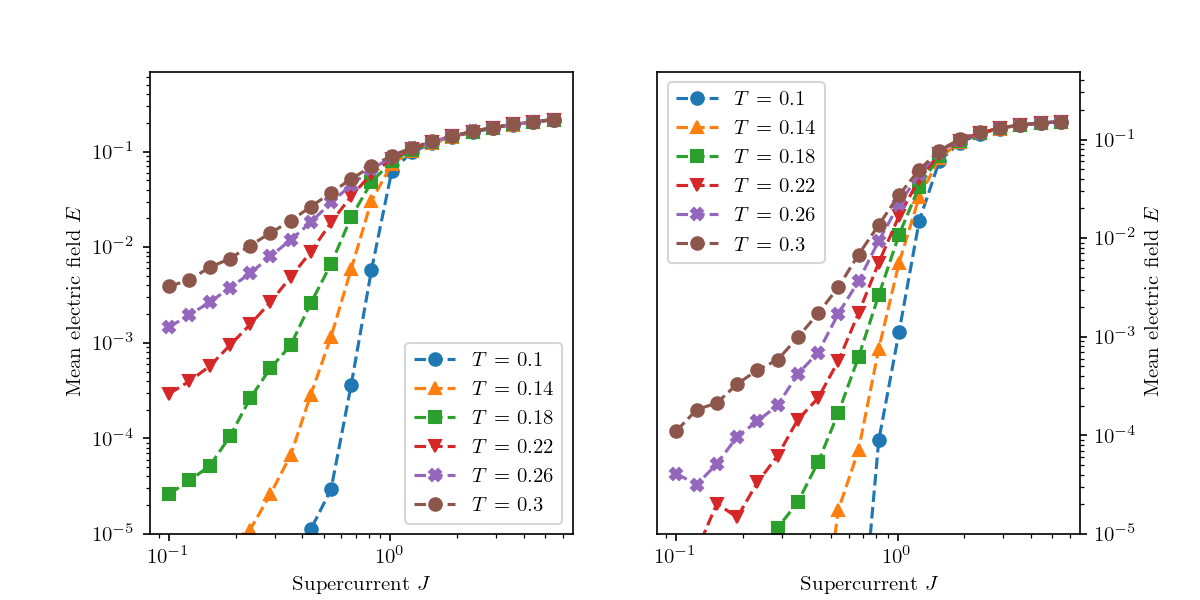

In [42]:
marker = cycle(['o', '^', 's', 'v', 'X']) 

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax1,ax2 = ax
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')
ax2.set_xscale("log", nonpositive='clip')
ax2.set_yscale("log", nonpositive='clip')


shift = 0
step = 2
for i,T in enumerate(Tvec[shift::step]):
    Epbc = Earr_pbc_mean[:,shift+step*i]
    Eobc = Earr_obc_mean[:,shift+step*i]
    J = Jvec
    mark = next(marker)
    ax1.plot(J,Epbc, '--',label=f"$T$ = {np.round(T, 2)}", marker = mark)
    ax2.plot(J,Eobc, '--',label=f"$T$ = {np.round(T, 2)}", marker = mark)
ax1.legend()
ax1.set_xlabel('Supercurrent $J$')
ax1.set_ylabel('Mean electric field $E$')
ax1.set_ylim(bottom=1e-5)
ax2.legend()
ax2.set_xlabel('Supercurrent $J$')
ax2.set_ylabel('Mean electric field $E$')
ax2.set_ylim(bottom=1e-5)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig('ej.pdf',bbox_inches='tight')

### Figure 23

<IPython.core.display.Javascript object>


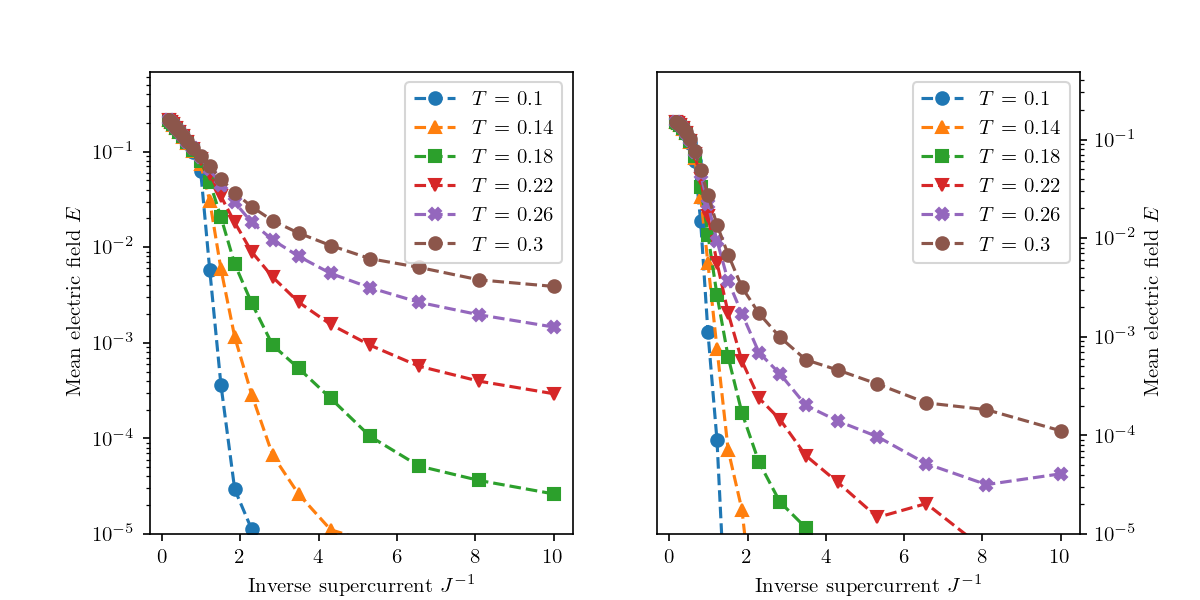

In [46]:
marker = cycle(['o', '^', 's', 'v', 'X']) 

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax1,ax2 = ax
ax1.set_yscale("log", nonpositive='clip')
ax2.set_yscale("log", nonpositive='clip')


shift = 0
step = 2
for i,T in enumerate(Tvec[shift::step]):
    Epbc = Earr_pbc_mean[:,shift+step*i]
    Eobc = Earr_obc_mean[:,shift+step*i]
    J = Jvec
    Jinv = 1/Jvec
    mark = next(marker)
    ax1.plot(Jinv,Epbc, '--',label=f"$T$ = {np.round(T, 2)}", marker = mark)
    ax2.plot(Jinv,Eobc, '--',label=f"$T$ = {np.round(T, 2)}", marker = mark)
ax1.legend()
ax1.set_xlabel('Inverse supercurrent $J^{-1}$')
ax1.set_ylabel('Mean electric field $E$')
ax1.set_ylim(bottom=1e-5)
ax2.legend()
ax2.set_xlabel('Inverse supercurrent $J^{-1}$')
ax2.set_ylabel('Mean electric field $E$')
ax2.set_ylim(bottom=1e-5)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig('ejinv.pdf',bbox_inches='tight')

### Figure 24

<IPython.core.display.Javascript object>


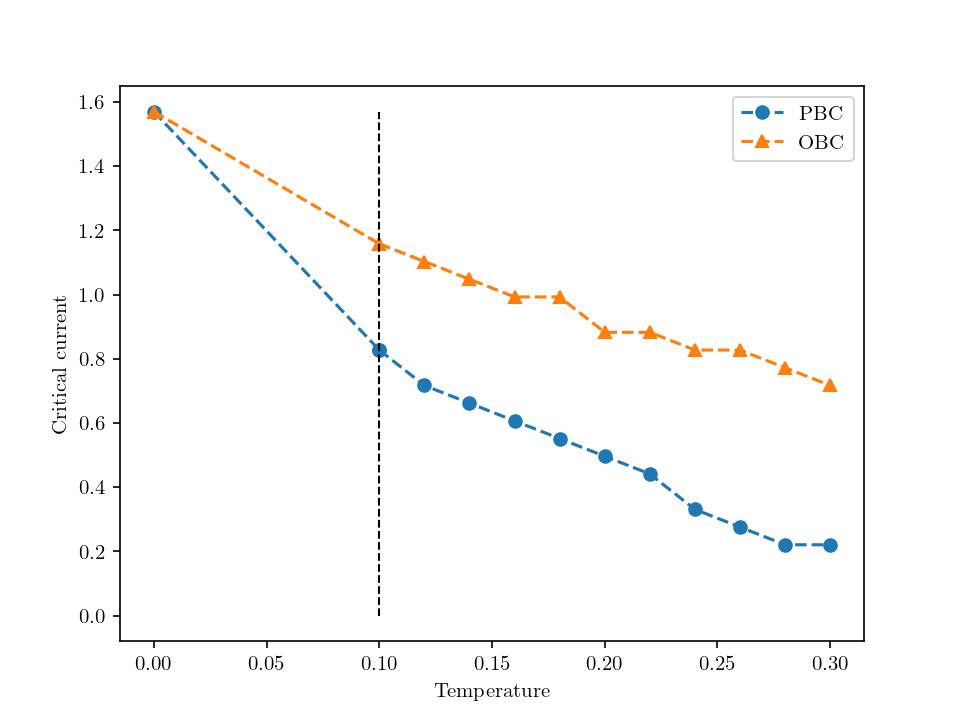

In [58]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

Jc_pbc_list = np.zeros(len(Tvec))
Jc_obc_list = np.zeros(len(Tvec))

for i,T in enumerate(Tvec[shift::step]):
    J = Jvec
    Epbc = Earr_pbc_mean[1:,shift+step*i]
    Eobc = Earr_obc_mean[1:,shift+step*i]
    
    # Interpolate
    x = np.linspace(0,J.max(),100)
    y = np.interp(x,J[1:],Epbc)
    const = 0*x+0.01
    idx = np.argwhere(np.diff(np.sign(y-const)))
    Jc_pbc_list[i] = x[idx]
    
    x = np.linspace(0,J.max(),100)
    y = np.interp(x,J[1:],Eobc)
    const = 0*x+0.01
    idx = np.argwhere(np.diff(np.sign(y-const)))
    Jc_obc_list[i] = x[idx]
plt.figure()
color=next(colors)
plt.plot(Tvec, Jc_pbc_list,'o--',color=color,label='PBC')
plt.plot([0,0.1],[1.57, Jc_pbc_list[0]],'o--',color=color)
color=next(colors)
plt.plot(Tvec, Jc_obc_list,'^--',color=color,label='OBC')
plt.plot([0,0.1],[1.57, Jc_obc_list[0]],'^--',color=color)

plt.plot([0.1,0.1],[0, 1.57],'k--',linewidth=1)
plt.xlabel('Temperature')
plt.ylabel('Critical current')
plt.legend()
plt.savefig('jct.pdf',bbox_inches='tight')